In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [2]:
df = pd.read_csv('labeled_data.csv')

In [3]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [5]:
df.shape

(24783, 7)

In [6]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [8]:
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [9]:
lem = WordNetLemmatizer()

In [10]:
corpus = []
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['tweet'][i])
    review = review.lower()
    review = review.split()
    review = [lem.lemmatize(word)for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [11]:
cleaned_tweet = pd.DataFrame(corpus)

In [12]:
cleaned_tweet

,0
0,rt mayasolovely woman complain cleaning house ...
1,rt mleew boy dat cold tyga dwn bad cuffin dat ...
2,rt urkindofbrand dawg rt sbaby life ever fuck ...
3,rt c g anderson viva based look like tranny
4,rt shenikaroberts shit hear might true might f...
...,...
24778,muthaf lie lifeasking pearl corey emanuel righ...
24779,gone broke wrong heart baby drove redneck crazy
24780,young buck wanna eat dat nigguh like aint fuck...
24781,youu got wild bitch tellin lie


In [13]:
dff = pd.concat([df,cleaned_tweet],axis=1)

In [14]:
dff

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,0
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely woman complain cleaning house ...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew boy dat cold tyga dwn bad cuffin dat ...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt sbaby life ever fuck ...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt c g anderson viva based look like tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts shit hear might true might f...
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf lie lifeasking pearl corey emanuel righ...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",gone broke wrong heart baby drove redneck crazy
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like aint fuck...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,youu got wild bitch tellin lie


In [15]:
dff.rename(columns={'0':'cleaned'})

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,0
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely woman complain cleaning house ...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew boy dat cold tyga dwn bad cuffin dat ...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt sbaby life ever fuck ...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt c g anderson viva based look like tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts shit hear might true might f...
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf lie lifeasking pearl corey emanuel righ...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",gone broke wrong heart baby drove redneck crazy
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like aint fuck...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,youu got wild bitch tellin lie


In [16]:
dff.columns

Index([        'Unnamed: 0',              'count',        'hate_speech',
       'offensive_language',            'neither',              'class',
                    'tweet',                    0],
      dtype='object')

In [17]:
dff.columns = ['Unnamed','count','hate_speech','offensive_language','neither','class','tweet','cleaned']

In [18]:
dff

,Unnamed,count,hate_speech,offensive_language,neither,class,tweet,cleaned
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely woman complain cleaning house ...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew boy dat cold tyga dwn bad cuffin dat ...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt sbaby life ever fuck ...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt c g anderson viva based look like tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts shit hear might true might f...
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf lie lifeasking pearl corey emanuel righ...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",gone broke wrong heart baby drove redneck crazy
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like aint fuck...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,youu got wild bitch tellin lie


In [19]:
dff.isnull().sum()

Unnamed               0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
cleaned               0
dtype: int64

In [20]:
final = dff[['class','cleaned']]

In [21]:
final

,class,cleaned
0,2,rt mayasolovely woman complain cleaning house ...
1,1,rt mleew boy dat cold tyga dwn bad cuffin dat ...
2,1,rt urkindofbrand dawg rt sbaby life ever fuck ...
3,1,rt c g anderson viva based look like tranny
4,1,rt shenikaroberts shit hear might true might f...
...,...,...
24778,1,muthaf lie lifeasking pearl corey emanuel righ...
24779,2,gone broke wrong heart baby drove redneck crazy
24780,1,young buck wanna eat dat nigguh like aint fuck...
24781,1,youu got wild bitch tellin lie


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='class', ylabel='count'>

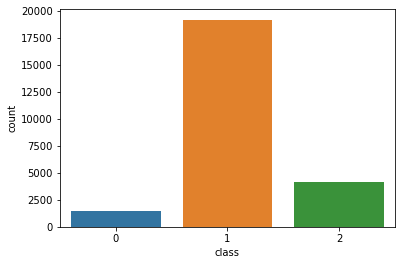

In [23]:
sns.countplot(x='class',data=final)

In [24]:
from collections import Counter

In [25]:
cnt = Counter()

for text in final['cleaned'].values:
    for word in text.split():
        cnt[word]+=1
        
cnt.most_common(20)

[('bitch', 11479),
 ('rt', 7650),
 ('hoe', 4364),
 ('http', 3127),
 ('co', 3017),
 ('like', 2837),
 ('pussy', 2272),
 ('nigga', 2026),
 ('as', 1581),
 ('get', 1550),
 ('u', 1547),
 ('fuck', 1463),
 ('shit', 1310),
 ('got', 1294),
 ('trash', 1165),
 ('lol', 1109),
 ('amp', 930),
 ('know', 863),
 ('one', 763),
 ('love', 747)]

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
cv = CountVectorizer(analyzer='word')

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
mnb = MultinomialNB()

In [31]:
mes = cv.fit_transform(final['cleaned'])

In [32]:
mes.shape

(24783, 33144)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(mes, final['class'], test_size=0.4, random_state=42)

In [34]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [35]:
pred = mnb.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,RocCurveDisplay,auc

In [37]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.35      0.05      0.08       572\n           1       0.87      0.98      0.92      7664\n           2       0.88      0.62      0.72      1678\n\n    accuracy                           0.87      9914\n   macro avg       0.70      0.55      0.58      9914\nweighted avg       0.84      0.87      0.84      9914\n'

In [38]:
accuracy_score(y_test,pred)

0.8669558200524511

In [45]:
confusion_matrix(y_test,pred)

array([[  27,  498,   47],
       [  35, 7532,   97],
       [  16,  626, 1036]], dtype=int64)